Extracting data for question 1

In [1]:
import os
import pandas as pd

# Since the notebook is inside Project 2, we just go from current folder
folder = "computed data/pore analysis"

# List of target properties to extract
properties = [
    "Density",
    "ASA_m^2/g",
    "POAV_A^3",
    "POAV_Volume_fraction"
]

data = []

# Loop through all CSV files
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        path = os.path.join(folder, filename)
        df = pd.read_csv(path)
        
        # Convert to dictionary for easy lookup
        kv = pd.Series(df.Value.values, index=df.Key).to_dict()
        
        # Extract desired properties
        entry = {"Material": filename.replace(".csv", "")}
        for prop in properties:
            entry[prop] = float(kv.get(prop, "nan"))
        
        data.append(entry)

# Create a summary dataframe
summary_df = pd.DataFrame(data)

# Display or save
print(summary_df)
summary_df.to_csv("pore_analysis_summary.csv", index=False)


  Material   Density  ASA_m^2/g  POAV_A^3  POAV_Volume_fraction
0  MgMOF74  0.886275    1842.96   837.198               0.61368
1  NOTT300  1.039260    1648.23  1297.110               0.48999
2   UTSA20  0.882399    2607.10  3575.360               0.62907
3   UTSA80  0.678215    3188.86  9619.780               0.66798
4     ZIF8  0.909567    1736.33  2488.250               0.49906


making a nice graph

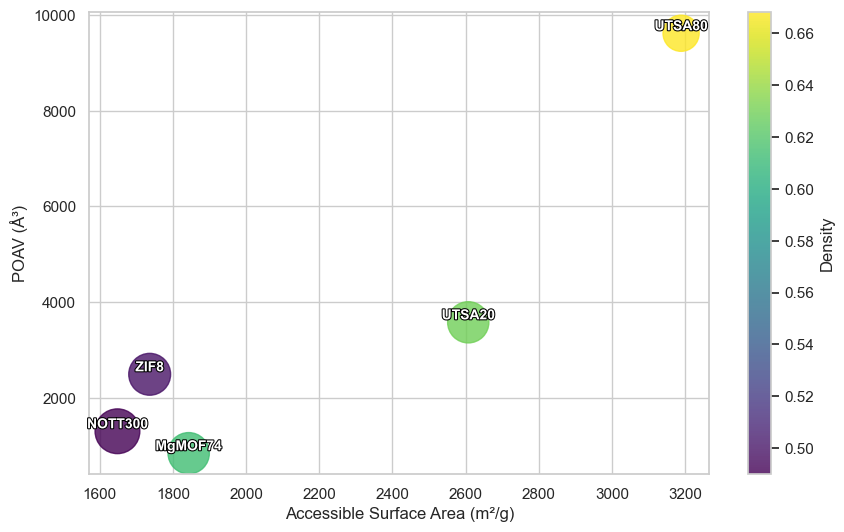

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patheffects as path_effects

# (same data)
data = {
    "Material": ["MgMOF74","NOTT300","UTSA20","UTSA80","ZIF8"],
    "Density": [0.88628, 1.03926, 0.88240, 0.67822, 0.90957],
    "ASA_m2/g": [1842.96, 1648.23, 2607.10, 3188.86, 1736.33],
    "POAV_A3": [837.20, 1297.11, 3575.36, 9619.78, 2488.25],
    "POAV_Volume_fraction": [0.61368, 0.48999, 0.62907, 0.66798, 0.49906]
}
df = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    df["ASA_m2/g"], df["POAV_A3"], 
    s=df["Density"]*1000,
    c=df["POAV_Volume_fraction"], cmap="viridis", alpha=0.8
)

for i, txt in enumerate(df["Material"]):
    text = plt.annotate(
        txt, 
        (df["ASA_m2/g"][i], df["POAV_A3"][i]), 
        fontsize=10, ha="center", va="bottom", color="white", weight="bold"
    )
    # Add black outline to make label readable on any color
    text.set_path_effects([
        path_effects.Stroke(linewidth=1.5, foreground='black'),
        path_effects.Normal()
    ])

plt.colorbar(scatter, label="Density")
plt.xlabel("Accessible Surface Area (m²/g)")
plt.ylabel("POAV (Å³)")
plt.show()


same for q2

In [3]:
import os
import pandas as pd
import numpy as np

folder = "computed data/HenryK_Isotherms"
mofs = ["MgMOF", "NOTT300", "UTSA20", "UTSA80", "ZIF8"]

henry_data = {"Material": [], "CO2": [], "N2": []}

for mof in mofs:
    henry_data["Material"].append(mof)
    
    for gas in ["CO2", "N2"]:
        file_path = os.path.join(folder, f"{mof}_{gas}.csv")
        df = pd.read_csv(file_path)
        
        row = df[df["Key"].str.strip() == "henry_coefficient_average"]
        if not row.empty:
            # Keep as string to preserve exact formatting
            kH = row["Value"].iloc[0]
        else:
            kH = np.nan
            
        henry_data[gas].append(kH)

# Create DataFrame
henry_df = pd.DataFrame(henry_data)

# Sort by CO2 descending
henry_df = henry_df.sort_values(by="CO2", ascending=False).reset_index(drop=True)

# Display exact values as strings (no rounding)
pd.set_option('display.float_format', lambda x: '%.20f' % x if pd.notnull(x) else 'NaN')
print(henry_df)


  Material          CO2           N2
0    MgMOF  8.89038e-05   3.3373e-06
1     ZIF8  8.80771e-06          NaN
2   UTSA20  4.10731e-05  4.38848e-06
3   UTSA80  1.69012e-05  3.33558e-06
4  NOTT300  0.000184318  1.05463e-05


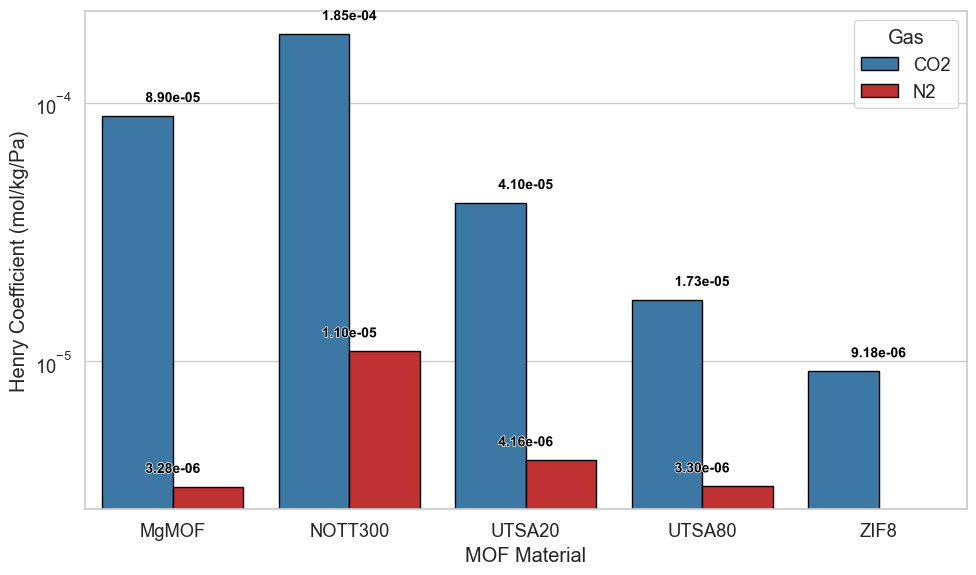

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects

# Data
data = {
    "Material": ["MgMOF","NOTT300","UTSA20","UTSA80","ZIF8"],
    "CO2": [0.0000890038, 0.0001845038, 0.0000410422, 0.0000173281, 0.0000091843],
    "N2": [0.0000032819, 0.0000109710, 0.0000041623, 0.0000032981, np.nan]
}
df = pd.DataFrame(data)

# Melt for Seaborn
df_melt = df.melt(id_vars="Material", value_vars=["CO2","N2"], var_name="Gas", value_name="Henry Coefficient")

# Plot settings
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10,6))
palette = {"CO2":"#2c7bb6", "N2":"#d7191c"}  # professional, contrasting colors
bar_plot = sns.barplot(
    x="Material", y="Henry Coefficient", hue="Gas",
    data=df_melt, palette=palette, edgecolor="black", dodge=True
)

# Add value labels inside bars (log scale aware)
for i, row in df_melt.iterrows():
    if not np.isnan(row["Henry Coefficient"]):
        bar_plot.text(
            x=i % 5,
            y=row["Henry Coefficient"]*1.1,  # slightly above for small bars
            s=f"{row['Henry Coefficient']:.2e}",  # scientific notation
            ha="center",
            va="bottom",
            fontsize=10,
            weight="bold",
            color="black",
            path_effects=[path_effects.Stroke(linewidth=1, foreground='white'), path_effects.Normal()]
        )

plt.yscale("log")
plt.ylabel("Henry Coefficient (mol/kg/Pa)")
plt.xlabel("MOF Material")
plt.legend(title="Gas", loc="upper right")
plt.tight_layout()
plt.show()


3. pure isotherms: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Folder containing the csv files
folder_path = "computed data/HenryK_Isotherms"

# Liste pour stocker les DataFrames créés
dfs = {}


# Boucle sur chaque fichier CSV du dossier
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Extraction de la chaîne contenant les données d'isotherme
        isotherm_str = df.loc[df["Key"] == "isotherm", "Value"].values[0]
        isotherm_dict = ast.literal_eval(isotherm_str)
        
        # Création du DataFrame avec pression et loading
        df_iso = pd.DataFrame({
            "pressure": isotherm_dict["pressure"],
            "loading_absolute_average": isotherm_dict["loading_absolute_average"]
        })
        
        # On garde le DataFrame dans un dictionnaire avec le nom du fichier (sans .csv)
        dfs[os.path.splitext(filename)[0]] = df_iso

# Exemple : accéder à un DataFrame spécifique
# df_co2 = dfs["q3to4_CO2"]

# Si tu veux tous les afficher :
for name, df_iso in dfs.items():
    print(f"--- {name} ---")
    print(df_iso.head(), "\n")


# Plotting the pure isotherms
plt.figure(figsize=(8,6))
plt.plot(df_ch4["pressure"], df_ch4["loading_absolute_average"], 'o-', label='CH4 isotherm')
plt.plot(df_co2["pressure"], df_co2["loading_absolute_average"], 'o-', label='CO2 isotherm')
plt.xlabel("Pressure (bar)")
plt.ylabel("Loading (mmol/g)")
plt.title("Pure isotherms of CO2 and CH4 at 300K")
plt.legend()
plt.grid(True)
plt.show()

4. working capacity

In [ ]:
import pyiast


# Create Isotherm objects using interpolation
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="loading_absolute_average",
                                    pressure_key="pressure",
                                     fill_value=df_ch4["loading_absolute_average"].max())

co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="loading_absolute_average",
                                    pressure_key="pressure",
                                    fill_value=df_co2["loading_absolute_average"].max())

5. selectivity

In [ ]:
P_range = np.array([0.1, 1.0, 2.0, 3.0])

for P in P_range:
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )

    # Selectivity calculation
    S_co2_ch4 = (result[1] / result[0]) * (mole_fraction[0] / mole_fraction[1])
    print(f"Selectivity of CO2 over CH4 at P={P} bar is equal to {S_co2_ch4:.4f}\n")

6. WC/S plot